# Atmospheric CO<sub>2</sub> levels
Mauna Loa Observatory, Hawaii 1958 - 2018

Download the data file **``co2_mm_mlo.txt``** from <br />
https://climate.nasa.gov/vital-signs/carbon-dioxide/

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 

In [39]:
df = pd.read_table('co2_mm_mlo.txt', skiprows=72, delim_whitespace=True)

In [40]:
x = np.array(df[[2]])
Y = np.array(df[[4]])
m = len(x)
print m

725


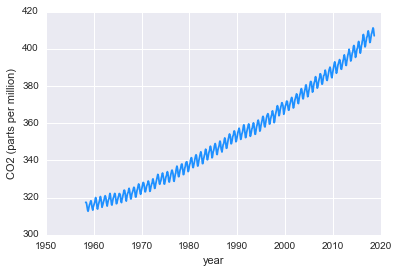

In [41]:
plt.plot( x, Y, color='dodgerblue')
plt.xlabel('year')
plt.ylabel('CO2 (parts per million)');

## Linear fit 

$
\textrm{Model:} \quad\hat{y} = w_0 + w_1 x
$

$
\textrm{Training set:} \quad
\{(x^{(1)},y^{(1)})\},\dots,\{(x^{(m)},y^{(m)})\}
$

$
\textrm{Design matrix:} \quad 
X = \left[
\begin{array}
1 1 & x^{(1)}\\
1 & x^{(2)}\\
\vdots & \vdots\\
1 & x^{(m)}
\end{array}
\right]
%
\quad , \quad
Y = \left[
\begin{array}
1 y^{(1)}\\
y^{(2)}\\
\vdots \\
y^{(m)}
\end{array}
\right]
%
\quad , \quad
\theta^* = \left[
\begin{array}
1 w_0\\
w_1
\end{array}
\right]
$


$
\textrm{Normal equation:} 
\quad
\theta^* = (X^T X)^{-1}X^T Y
$

$
\textrm{Cost function:} 
\quad
J(\theta) = \frac{1}{2m} (X \theta-Y)^T  (X \theta-Y) 
$

 


In [42]:
# Normal equation
def best_fit_parameters(X,Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y) 

In [43]:
# Cost function
def cost_function(X,Y,theta):
    return (X.dot(theta)-Y).T.dot(X.dot(theta)-Y)[0][0]/2./len(Y)

In [44]:
# design matrix
X = np.hstack((x**0 , x))

In [45]:
theta = best_fit_parameters(X,Y)
fit = 'y = ' + '{:03.2f}'.format(theta[0][0]) + ' + {:03.2f}'.format(theta[1][0]) + ' x'
print fit
print 'J = ' + '{:03.2f}'.format(cost_function(X,Y,theta))

y = -2730.11 + 1.55 x
J = 8.41


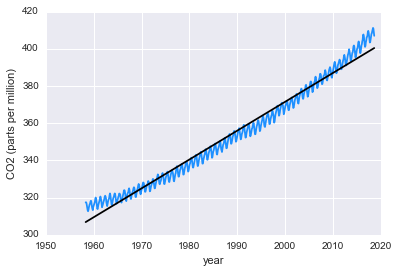

In [55]:
plt.plot(x , Y , color = 'dodgerblue')
plt.plot(x, theta[0] + theta[1]*x, '-k', label='linear fit')
plt.xlabel('year')
plt.ylabel('CO2 (parts per million)');

In [56]:
del X, theta

## Quadratic fit 

$
\textrm{Model:} \quad \hat{y} = w_0 + w_1 x + w_2 x^2
$



$
\textrm{Design matrix:} \quad 
X = \left[
\begin{array}
1 1 & x^{(1)} & (x^{(1)})^2 \\
1   & x^{(2)} & (x^{(2)})^2 \\
\vdots & \vdots & \vdots\\
1 & x^{(m)} & (x^{(m)})^2
\end{array}
\right]
%
\quad , \quad
%
\theta^* = \left[
\begin{array}
1 w_0\\
w_1 \\
w_2
\end{array}
\right]
$

Anything else stays the same.


In [57]:
X = np.hstack((x**0 , x , x**2)) # design matrix with quadratic terms

This is a better fit. <br />
The minimum of the cost function is lowered by the inclusion of a quadratic term.

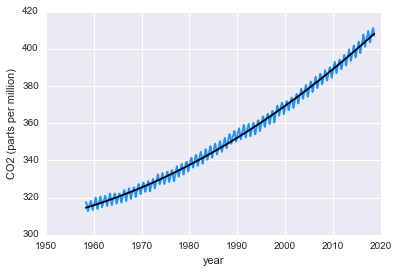

In [59]:
plt.plot(x , Y , color = 'dodgerblue')
plt.plot(x, theta[0] + theta[1]*x + theta[2]*x**2, '-k', label='linear fit')
plt.xlabel('year')
plt.ylabel('CO2 (parts per million)');

**Question:** Do you get an even better agreement if you keep increasing the order of the fitting polinomial? If not, why?

# Gradient Descent

$
\textrm{Gradient:} 
\quad
\nabla_{\theta}J = \frac{1}{m}X^T (X\theta-Y)
$

$
\textrm{Gradient descent:} 
\quad
\theta = \theta -\epsilon\ \nabla_{\theta}J \quad \textrm{until convergence to } \theta^*
$

In [60]:
def gradient_linear(X,Y,theta):
    return np.dot(X.T,(np.dot(X,theta)-Y))/len(X)

In [61]:
chi0 = x**0;
chi1 = (x-np.mean(x))/np.std(x);
chi2 = (x**2-np.mean(x**2))/np.std(x**2);
X = np.hstack((chi0 , chi1 , chi2))

In [62]:
R = np.array([[1.,-np.mean(x**1)/np.std(x**1),-np.mean(x**2)/np.std(x**2)],
[0.,1./np.std(x**1),0.],
[0.,0.,1./np.std(x**2)]])

In [73]:
theta = np.zeros((3,1))

In [74]:
epsilon = .6

In [77]:
for i in range(0, int(1e+6)):
    theta = theta - epsilon*gradient_linear(X,Y,theta)
print theta

[[ 353.62075862]
 [-845.28398693]
 [ 872.33817571]]


In [78]:
np.dot(R,theta)

array([[  4.69942085e+04],
       [ -4.84659717e+01],
       [  1.25767761e-02]])

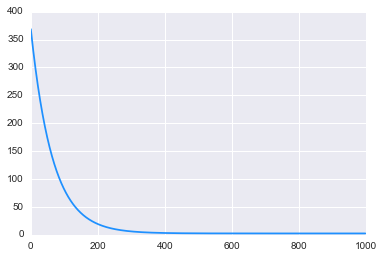

In [79]:
theta = np.zeros((3,1))
epsilon = 1.

step=list()
cost=list()

for i in range(0, 1000):
    for j in range(0,1000):
        theta = theta - epsilon*gradient_linear(X,Y,theta)
    step.append(i)
    cost.append(cost_function(X,Y,theta))
plt.plot(step, cost,color='dodgerblue');

In [87]:
print 'w0 = ' + '{:03.2f}'.format(np.dot(R,theta)[0][0])
print 'w1 = ' + '{:03.2f}'.format(np.dot(R,theta)[1][0])
print 'w2 = ' + '{:03.2f}'.format(np.dot(R,theta)[2][0])

w0 = 47459.67
w1 = -48.93
w2 = 0.01


# Breast Cancer

Download the data file **``wdbc.data``** from <br />
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

Research paper: <br />
https://www.ncbi.nlm.nih.gov/pubmed/8168063

In [ ]:
df = pd.read_table('wdbc.data',delimiter = ',',header=None)

In [ ]:
df[:10]

In [ ]:
X = np.hstack(([[1]]*len(df),np.array(df[np.arange(2,32)])))

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Testing with MNIST
https://www.python-course.eu/neural_network_mnist.php

In [ ]:
(2020**2 - 1960**2)